Look at the relation between single features and the class
- Train each classifier on a single feature -- check results 
- Graph each feature vs label

In [2]:
import numpy as np
import sklearn.neighbors
import sklearn.svm
import sklearn.linear_model
import sklearn.ensemble
import sklearn.naive_bayes
import pandas as pd
import seaborn as sns 
import torch

In [3]:
def classifierTest(feat):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(feat, labels, test_size=0.33, random_state=42)
    y_test = np.ravel(y_test)
    y_train = np.ravel(y_train)

    knn = sklearn.neighbors.KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_score = knn.score(X_test, y_test)
    print(knn_score)

    svm = sklearn.svm.SVC(kernel='rbf')
    svm.fit(X_train, y_train)
    svm_score = svm.score(X_test, y_test)
    print(svm_score)

    lr = sklearn.linear_model.LogisticRegression()
    lr.fit(X_train, y_train)
    lr_score = lr.score(X_test, y_test)
    print(lr_score)

    rf = sklearn.ensemble.RandomForestClassifier()
    rf.fit(X_train, y_train)
    rf_score = rf.score(X_test, y_test)
    print(rf_score)

    gb = sklearn.ensemble.GradientBoostingClassifier()
    gb.fit(X_train, y_train)
    gb_score = gb.score(X_test, y_test)
    print(gb_score)

    nb = sklearn.naive_bayes.GaussianNB()
    nb.fit(X_train, y_train)
    nb_score = nb.score(X_test, y_test)
    print(nb_score)

In [4]:
# Look at accuracy of training on a single feature
data = pd.read_pickle("data.pkl")

labels = data["Labels"]

for i in ["Kur_ECR", "Kur_FCU", "Skew_ECR", "Skew_FCU", "SSC_ECR", "SSC_FCU", "WA_ECR", "WA_FCU", "WL_ECR", "WL_FCU", "SD_ECR", "SD_FCU", "Zc_ECR", "Zc_FCU", "Mean_ECR", "Mean_FCU","Var_ECR", "Var_FCU", "Labels"]:
    print(i)
    classifierTest(data[[i]])

Kur_ECR
0.553072625698324
0.6145251396648045
0.553072625698324
0.5977653631284916
0.6145251396648045
0.5921787709497207
Kur_FCU
0.49162011173184356
0.553072625698324
0.5027932960893855
0.5195530726256983
0.4692737430167598
0.5139664804469274
Skew_ECR
0.6201117318435754
0.6312849162011173
0.6033519553072626
0.5754189944134078
0.5865921787709497
0.6368715083798883
Skew_FCU
0.553072625698324
0.5810055865921788
0.49162011173184356
0.5139664804469274
0.5754189944134078
0.5642458100558659
SSC_ECR
0.8324022346368715
0.776536312849162
0.8100558659217877
0.8100558659217877
0.8324022346368715
0.8324022346368715
SSC_FCU
0.6871508379888268
0.6871508379888268
0.6871508379888268
0.6871508379888268
0.6871508379888268
0.6871508379888268
WA_ECR
0.7374301675977654
0.770949720670391
0.7597765363128491
0.7541899441340782
0.770949720670391
0.7541899441340782
WA_FCU
0.888268156424581
0.8715083798882681
0.8770949720670391
0.88268156424581
0.88268156424581
0.8770949720670391
WL_ECR
0.8100558659217877
0.765363

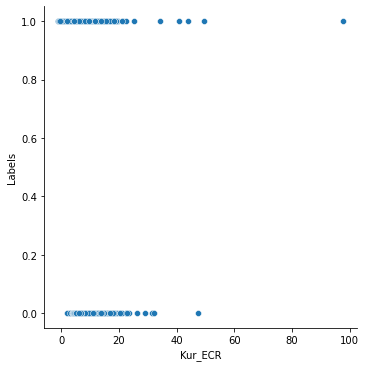

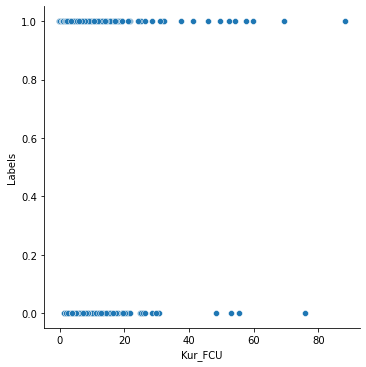

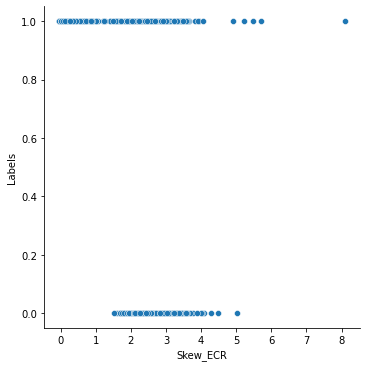

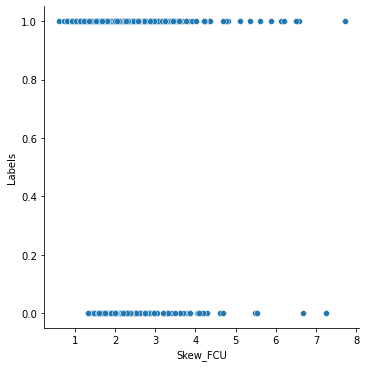

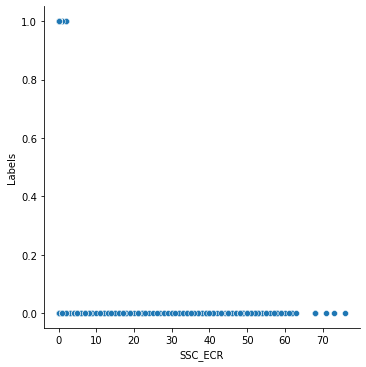

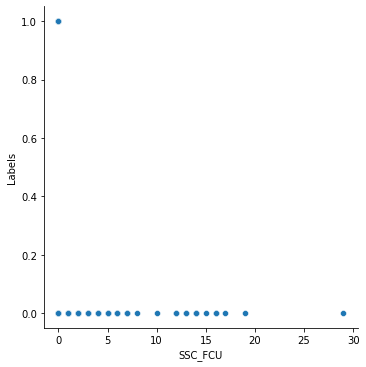

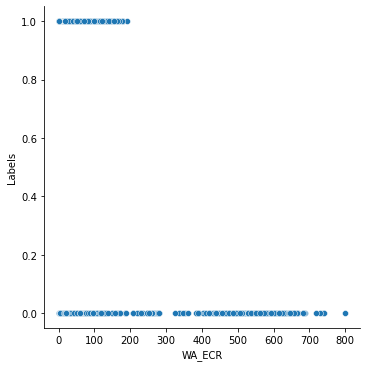

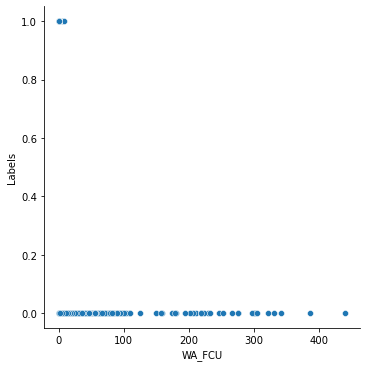

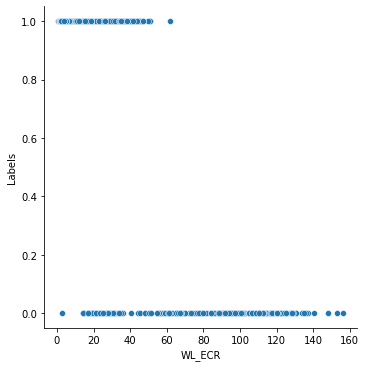

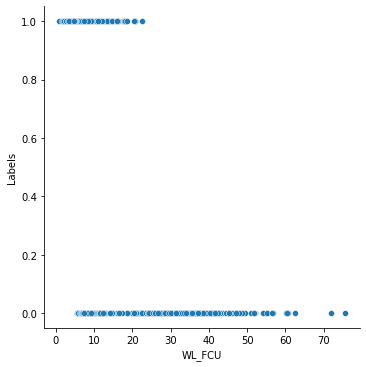

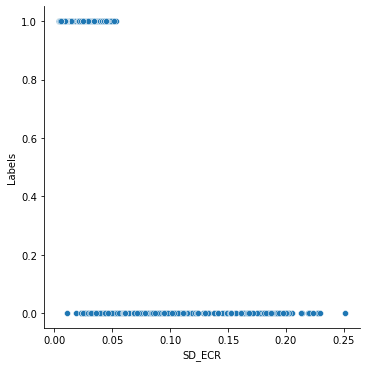

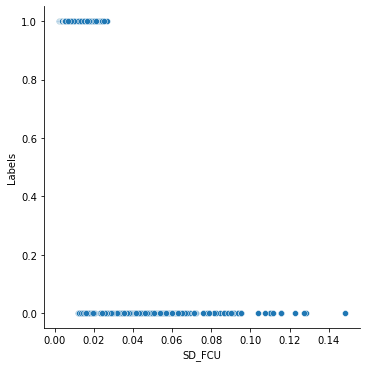

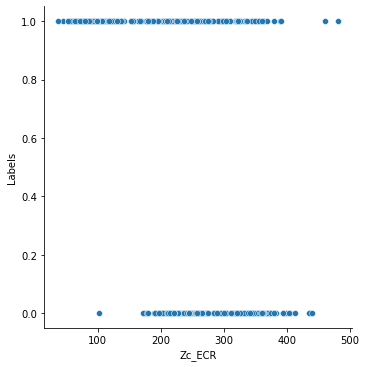

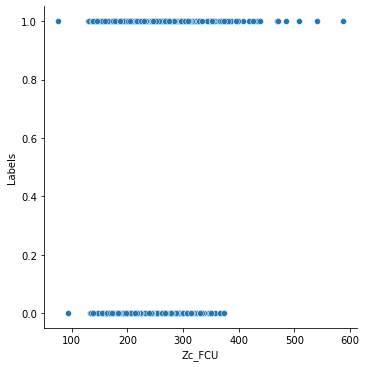

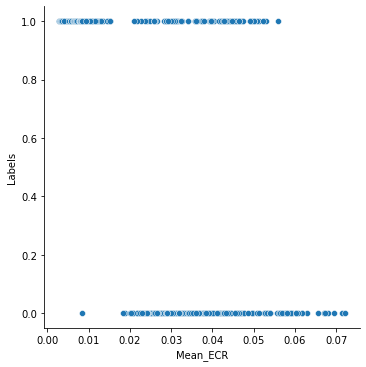

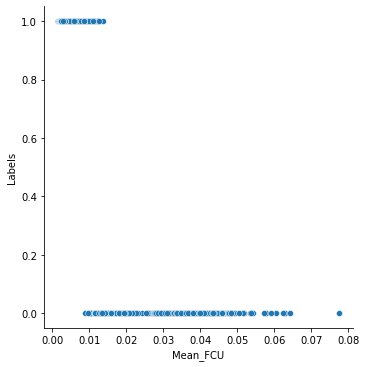

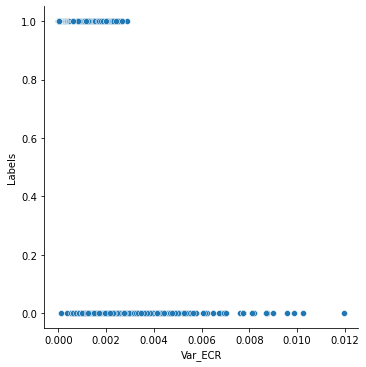

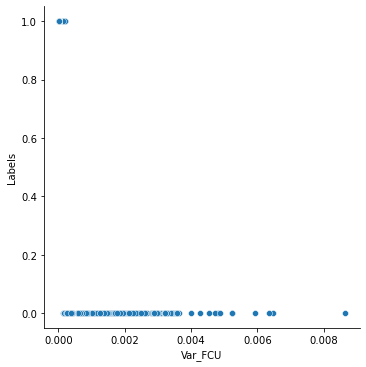

In [6]:
# Visualize each feature vs classification

columns = data.columns 
columns = columns[:18]

for c in columns:
    sns.relplot(data=data, x=data[c], y = data["Labels"])